# **KHANIF FAUZI PAMBUDI (GRADED CHALLENGE 1 PHASE 1)**

Graded  Challenge  ini  dibuat  guna  mengevaluasi pembelajaran  pada  Hacktiv8  Data  Science  Fulltime Program khususnya pada konsep Regression.
Dataset yang digunakan adalah https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

---



# **IMPORT LIBRARY**

In [17]:
import sys
assert sys.version_info >= (3, 5)

In [18]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [19]:
import numpy as np
import pandas as pd
import sklearn.linear_model

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import itertools
import gc
import os

%matplotlib inline

# **DATA LOADING**

In [21]:
import pandas as pd
rideshare = pd.read_csv('rideshare_kaggle.csv', index_col='cab_type', parse_dates=True)
rideshare.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
cab_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lyft,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
Lyft,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
Lyft,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
Lyft,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
Lyft,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# **DATA EXPLORATION**

In [22]:
len(rideshare)

693071

In [23]:
rideshare.shape

(693071, 56)

In [24]:
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693071 entries, Lyft to Uber
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                     693071 non-null  float64
 13  sur

In [25]:
rideshare.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [26]:
rideshare.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'ap

# **DATA CLEANING**

In [27]:
rideshare.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
t

In [28]:
prc = rideshare["price"] #menghitung mean dari kolom price
np.mean(prc)

16.545125490614065

In [29]:
rideshare['price'].fillna('16.5', inplace = True) #mengisi missing value kolom price dengan nilai mean price

In [30]:
rideshare.isna().sum() #mengecek kembali kolom setelah kolom missing value diisi dengan value

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

Setelah kolom price yang terdapat missing value dan diisi dengan nilai mean dari nilai price tersebut maka saat ini data set sudah tidak terdapat missing value dan siap untuk di proses

# **EDA**

In [31]:
rideshare['price']

cab_type
Lyft       5
Lyft      11
Lyft       7
Lyft      26
Lyft       9
        ... 
Uber      13
Uber     9.5
Uber    16.5
Uber      27
Uber      10
Name: price, Length: 693071, dtype: object

In [32]:
rideshare['hour']

cab_type
Lyft     9
Lyft     2
Lyft     1
Lyft     4
Lyft     3
        ..
Uber    23
Uber    23
Uber    23
Uber    23
Uber    23
Name: hour, Length: 693071, dtype: int64

In [33]:
rideshare['day']

cab_type
Lyft    16
Lyft    27
Lyft    28
Lyft    30
Lyft    29
        ..
Uber     1
Uber     1
Uber     1
Uber     1
Uber     1
Name: day, Length: 693071, dtype: int64

In [34]:
rideshare['month']

cab_type
Lyft    12
Lyft    11
Lyft    11
Lyft    11
Lyft    11
        ..
Uber    12
Uber    12
Uber    12
Uber    12
Uber    12
Name: month, Length: 693071, dtype: int64

In [35]:
rideshare['price'].unique()

array([5.0, 11.0, 7.0, 26.0, 9.0, 16.5, 10.5, 3.0, 27.5, 13.5, 12.0, 16.0,
       7.5, 5.5, '16.5', 3.5, 8.5, 15.0, 20.5, 19.5, 29.5, 9.5, 22.0,
       13.0, 17.0, 10.0, 34.0, 18.5, 36.0, 22.5, 32.5, 25.0, 27.0, 35.0,
       8.0, 23.5, 14.0, 26.5, 38.5, 23.0, 30.5, 17.5, 30.0, 36.5, 12.5,
       33.5, 21.5, 38.0, 18.0, 33.0, 32.0, 6.5, 11.5, 31.5, 28.5, 24.0,
       29.0, 31.0, 42.5, 41.0, 19.0, 52.5, 67.5, 15.5, 21.0, 45.5, 28.0,
       37.5, 14.5, 47.5, 4.5, 40.5, 55.0, 42.0, 46.5, 50.5, 24.5, 41.5,
       56.0, 25.5, 39.0, 57.5, 20.0, 39.5, 6.0, 35.5, 48.5, 37.0, 45.0,
       44.0, 34.5, 2.5, 46.0, 48.0, 47.0, 54.0, 52.0, 62.0, 43.0, 43.5,
       80.0, 65.0, 51.5, 40.0, 49.5, 58.0, 75.0, 62.5, 92.0, 87.0, 64.5,
       87.5, 73.5, 44.5, 80.5, 89.0, 53.0, 81.5, 60.5, 49.0, 53.5, 51.0,
       55.5, 37.85, 59.0, 18.35, 54.5, 76.0, 57.0, 89.5, 68.5, 58.5, 63.0,
       61.5, 68.0, 28.35, 10.6, 7.98, 59.5, 56.5, 8.35, 11.6, 64.0, 67.0,
       9.35, 97.5, 45.35, 19.35], dtype=object)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


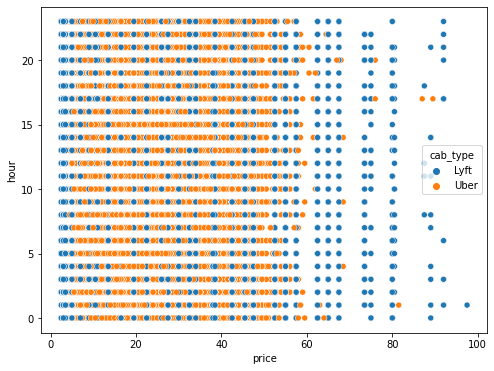

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rideshare,x='price',y='hour',hue='cab_type')

# **PREPROCESSING DATA**

In [37]:
data = rideshare.loc[:, ['hour', 'price' ]]
data.head()

,hour,price
cab_type,,
Lyft,9,5
Lyft,2,11
Lyft,1,7
Lyft,4,26
Lyft,3,9


In [38]:
data['days'] = pd.to_datetime(rideshare['datetime']).dt.day_name()
data.head()

,hour,price,days
cab_type,,,
Lyft,9,5,Sunday
Lyft,2,11,Tuesday
Lyft,1,7,Wednesday
Lyft,4,26,Friday
Lyft,3,9,Thursday


In [39]:
data['days'] = pd.to_datetime(rideshare['datetime']).dt.dayofweek
data.head()

,hour,price,days
cab_type,,,
Lyft,9,5,6
Lyft,2,11,1
Lyft,1,7,2
Lyft,4,26,4
Lyft,3,9,3


# **MODEL LINEAR REGRESSION**

In [42]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[rideshare["price"]]
ysample = np.c_[rideshare["hour"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(11.612224960244706, 0.0004178682971256003)

In [43]:
import sklearn.linear_model
lin1 = sklearn.linear_model.LinearRegression()

In [44]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [50]:
X = np.c_[rideshare["price"]]
y = np.c_[rideshare["hour"]]

# Train the model
lin1.fit(X, y)

# Make a prediction for price
X_new = np.array([[38.5]]) 
print(lin1.predict(X_new)) 

[[11.62831289]]


# **TRAINING MODEL**

In [100]:
import pandas as pd
ride = pd.read_csv('rideshare_kaggle.csv', index_col='datetime', parse_dates=True)

In [101]:
daily = ride.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

In [102]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [103]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [104]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [105]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,annual
datetime,,,,,,,,,,
2018-11-26,6.337109e+14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2018-11-27,1.527237e+15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002740
2018-11-28,1.478578e+15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.005479
2018-11-29,1.203399e+15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.008219
2018-11-30,9.046840e+14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010959


In [106]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'annual']
X = daily[column_names]
y = daily['Total']

lin1.fit(X, y)
daily['predicted'] = lin1.predict(X)

In [110]:
daily[['Total', 'predicted']]

,Total,predicted
datetime,,
2018-11-26,6.337109e+14,8.680738e+14
2018-11-27,1.527237e+15,8.716548e+14
2018-11-28,1.478578e+15,6.559913e+14
2018-11-29,1.203399e+15,8.221838e+14
2018-11-30,9.046840e+14,7.654465e+14
2018-12-01,9.078620e+14,7.665242e+14
2018-12-02,9.016533e+14,7.756747e+14
2018-12-03,9.017078e+14,7.049420e+14
2018-12-04,2.536123e+14,7.085230e+14


# **MODEL INFERENCE**

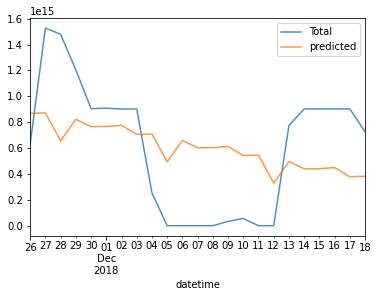

In [108]:
daily[['Total', 'predicted']].plot(alpha=0.8);

In [54]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure best_fit_model_plot


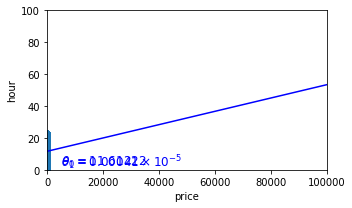

In [64]:
rideshare.plot(kind='scatter', x="price", y='hour', figsize=(5,3))
plt.xlabel("price")
plt.axis([0, 100000, 0, 100])
X=np.linspace(0, 100000, 100)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 11.61222$", fontsize=12, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 0.00041 \times 10^{-5}$", fontsize=12, color="b")
save_fig('best_fit_model_plot')
plt.show()


# **CONCLUSION**

Setelah dilakukan plotting pada hasil prediksi dapat dilihat bahwa penggunaan regresi linear kurang menghasilkan akurat karena hasil persebaran data total dan data prediksi nya tidak menghasilkan grafik yang mendekati namun dibeberapa datetime terdapat hasil prediksi yang mendekati